- what is the percentage of people that was hired?
- what is the most popular characteristics of people that was hired?
- Which sex is rather to be hired? male or female?
- what is the most popular age range that is hired?
- what is the minumum grade that you have to take in exam to be hired?
- What is the best model to classify if a person is going to be hired or not?


# First, let's do Exploratory Data Analysis

In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset and showing what it is like

file1 = pd.read_csv("data.csv", index_col=0)
file1

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


In [3]:
# Checking dataset type

type(file1)

pandas.core.frame.DataFrame

In [4]:
# Checking dataset shape

file1.shape

(20000, 11)

In [5]:
# Checking variables (columns) data type

file1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        19909 non-null  object 
 1   cheveux     19897 non-null  object 
 2   age         19909 non-null  float64
 3   exp         19904 non-null  float64
 4   salaire     19905 non-null  float64
 5   sexe        19900 non-null  object 
 6   diplome     19890 non-null  object 
 7   specialite  19907 non-null  object 
 8   note        19886 non-null  float64
 9   dispo       19894 non-null  object 
 10  embauche    20000 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 1.8+ MB


In [6]:
# Checking if there is any duplicated rows

duplicates_row = file1[file1.duplicated()]
print("Number of duplicated rows = ", duplicates_row.shape)

# It seems like there is no duplicates

Number of duplicated rows =  (0, 11)


In [7]:
# Printing values to see if there in "nan" value

print("date")
print(file1.date.unique())
print("\n")
print("cheveux")
print(file1.cheveux.unique())
print("\n")
print("age")
print(file1.age.unique())
print("\n")
print("exp")
print(file1.exp.unique())
print("\n")
print("salaire")
print(file1.salaire.unique())
print("\n")
print("sexe")
print(file1.sexe.unique())
print("\n")
print("diplome")
print(file1.diplome.unique())
print("\n")
print("specialite")
print(file1.specialite.unique())
print("\n")
print("note")
print(file1.note.unique())
print("\n")
print("dispo")
print(file1.dispo.unique())
print("\n")
print("embauche")
print(file1.embauche.unique())
print("\n")

# Looks like we have "nan" values here

date
['2012-06-02' '2011-04-21' '2012-09-07' ... '2011-03-04' '2014-08-26'
 '2011-07-11']


cheveux
['roux' 'blond' 'brun' 'chatain' nan]


age
[25. 35. 29. nan 37. 33. 31. 43. 28. 50. 44. 39. 23. 38. 30. 42. 27. 19.
 40. 49. 26. 59. 41. 34. 24. 16. 36. 48. 47. 53. 20. 22. 54. 46. 45. 61.
 21. 56. 14. 32. 55. 52. 65. 10. 51. 17. 12. 13.  8. 15. 57. 62. 18. 58.
  5. 67. 63.  6.  9. 11.  3. -1. 69. 64.  4. 60.  2.  7. -3. 72. 66. 71.
  0. 74.  1. 68. -2.]


exp
[ 9. 13. 12.  6.  8. 10. 11.  4. 14.  3.  7. 15.  5. 16.  2. 17.  0. nan
  1. 21. 18. 19. 20. -1. 23. -2.]


salaire
[26803. 38166. 35207. ... 39591. 41107. 44499.]


sexe
['F' 'M' nan]


diplome
['licence' 'master' 'doctorat' 'bac' nan]


specialite
['geologie' 'forage' 'detective' 'archeologie' nan]


note
[ 97.08  63.86  78.5  ...  23.51 103.48  45.62]


dispo
['non' 'oui' nan]


embauche
[0 1]




In [8]:
# Checking how many null values do we have in this dataset

print(file1.isnull().sum())

date           91
cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64


In [9]:
# We have a lot of null values. When we want to build a model the null values will not very useful.
# So, we are going to use "Imputation method with Mean()" to solve this problem.
# Let's put mean values to these null values.

file1.fillna(file1.mean(), inplace=True)

/var/folders/qb/0lynxgl11t3f9hxpry_kvf2h0000gn/T/ipykernel_5314/882293988.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  file1.fillna(file1.mean(), inplace=True)


In [10]:
# Now we have filled some of null values. But we still have a lot.
# Which is the values that are in categorical variables. They can't be used to calculate mean().
# So, we have to use other method to solve this.

print(file1.isnull().sum())

date           91
cheveux       103
age             0
exp             0
salaire         0
sexe          100
diplome       110
specialite     93
note            0
dispo         106
embauche        0
dtype: int64


In [11]:
# Lets impute these null values with most frequent values in the dataset
# We do it because they are categorical values

for col in file1.columns:
    if file1[col].dtypes == 'object':
        # Impute with the most frequent value
        file1 = file1.apply(lambda x:x.fillna(x.value_counts().index[0]))
# Count the number of NaNs in the dataset and print the counts to verify
print(file1.isnull().sum())

# Seems like we have solved this problem

date          0
cheveux       0
age           0
exp           0
salaire       0
sexe          0
diplome       0
specialite    0
note          0
dispo         0
embauche      0
dtype: int64


In [12]:
file1["date"] = pd.to_datetime(file1.date, dayfirst = True)


In [13]:
file1["date"]


0       2012-06-02
1       2011-04-21
2       2012-09-07
3       2011-07-01
4       2012-08-07
           ...    
19995   2012-03-10
19996   2010-09-19
19997   2010-09-02
19998   2011-12-06
19999   2010-11-29
Name: date, Length: 20000, dtype: datetime64[ns]

In [14]:
# Now, let's check if there is any "nan" in the dataset.

print("date")
print(file1.date.unique())
print("\n")
print("cheveux")
print(file1.cheveux.unique())
print("\n")
print("age")
print(file1.age.unique())
print("\n")
print("exp")
print(file1.exp.unique())
print("\n")
print("salaire")
print(file1.salaire.unique())
print("\n")
print("sexe")
print(file1.sexe.unique())
print("\n")
print("diplome")
print(file1.diplome.unique())
print("\n")
print("specialite")
print(file1.specialite.unique())
print("\n")
print("note")
print(file1.note.unique())
print("\n")
print("dispo")
print(file1.dispo.unique())
print("\n")
print("embauche")
print(file1.embauche.unique())
print("\n")

# Seems like we don't have any.

date
['2012-06-02T00:00:00.000000000' '2011-04-21T00:00:00.000000000'
 '2012-09-07T00:00:00.000000000' ... '2011-03-04T00:00:00.000000000'
 '2014-08-26T00:00:00.000000000' '2011-07-11T00:00:00.000000000']


cheveux
['roux' 'blond' 'brun' 'chatain']


age
[25.         35.         29.         35.00452057 37.         33.
 31.         43.         28.         50.         44.         39.
 23.         38.         30.         42.         27.         19.
 40.         49.         26.         59.         41.         34.
 24.         16.         36.         48.         47.         53.
 20.         22.         54.         46.         45.         61.
 21.         56.         14.         32.         55.         52.
 65.         10.         51.         17.         12.         13.
  8.         15.         57.         62.         18.         58.
  5.         67.         63.          6.          9.         11.
  3.         -1.         69.         64.          4.         60.
  2.          7.         -3.  

In [15]:
print(file1.isnull().sum())

# Just checking again kkkkk

date          0
cheveux       0
age           0
exp           0
salaire       0
sexe          0
diplome       0
specialite    0
note          0
dispo         0
embauche      0
dtype: int64


In [16]:
# Now, let's see if all the columns are completed. Another checking method

file1.info()
file1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        20000 non-null  datetime64[ns]
 1   cheveux     20000 non-null  object        
 2   age         20000 non-null  float64       
 3   exp         20000 non-null  float64       
 4   salaire     20000 non-null  float64       
 5   sexe        20000 non-null  object        
 6   diplome     20000 non-null  object        
 7   specialite  20000 non-null  object        
 8   note        20000 non-null  float64       
 9   dispo       20000 non-null  object        
 10  embauche    20000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.8+ MB


(20000, 11)

<AxesSubplot:>

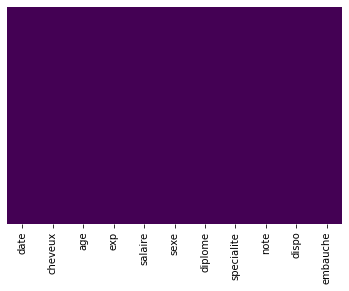

In [17]:
#Seeing visually if there is any null value 

sns.heatmap(file1.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [18]:
# Just seeing dataset columns

file1.columns

Index(['date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
       'specialite', 'note', 'dispo', 'embauche'],
      dtype='object')

In [19]:
# Seeing what is the value of mean and median of each column

print("Age:")
print(file1["age"].mean())
print(file1["age"].median())
print("\n")

print("Experience:")
print(file1["exp"].mean())
print(file1["exp"].median())
print("\n")

print("Salary:")
print(file1["salaire"].mean())
print(file1["salaire"].median())
print("\n")

print("Grade:")
print(file1["note"].mean())
print(file1["note"].median())
print("\n")

print("Hired:")
print(file1["embauche"].mean())
print(file1["embauche"].median())
print("\n")

Age:
35.00452056858701
35.0


Experience:
9.500351688102878
9.0


Salary:
34974.34393368505
34974.343933685006


Grade:
75.16876194307513
75.16876194307517


Hired:
0.1146
0.0




<AxesSubplot:ylabel='Frequency'>

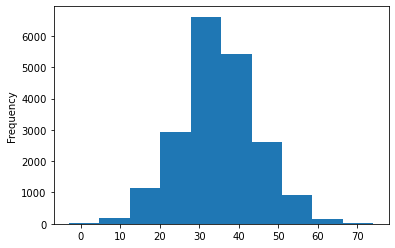

In [20]:
# Plotting histogram of a variable

file1.age.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

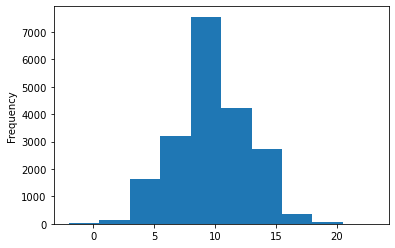

In [21]:
# Plotting histogram of a variable

file1.exp.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

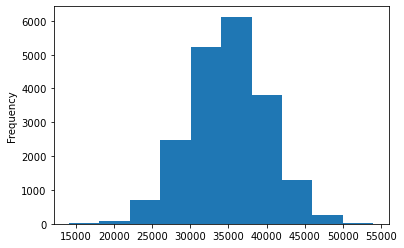

In [22]:
# Plotting histogram of a variable

file1.salaire.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

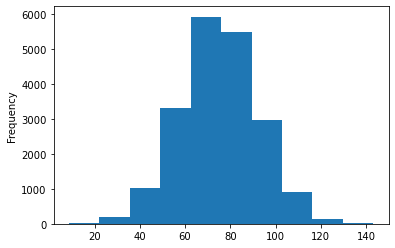

In [23]:
# Plotting histogram of a variable

file1.note.plot(kind="hist")

Text(0.5, 1.0, 'Histograma do Hired')

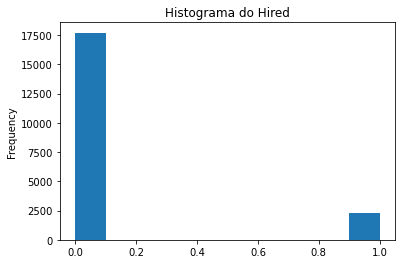

In [24]:
# Plotting histogram of a variable with Title

file1.embauche.plot(kind="hist")
plt.title("Histograma do Hired")

In [25]:
# Checking if there is any correlation between numerical variables

correlation1 = file1.corr()
correlation1

,age,exp,salaire,note,embauche
age,1.000000,-0.002775,0.001157,-0.007500,-0.011597
exp,-0.002775,1.000000,0.009658,-0.012127,0.006592
salaire,0.001157,0.009658,1.000000,-0.446044,0.002338
note,-0.007500,-0.012127,-0.446044,1.000000,0.003009
embauche,-0.011597,0.006592,0.002338,0.003009,1.000000


In [26]:
print("embauche")
cont_hired = file1.embauche.value_counts().to_frame().reset_index()
cont_hired.columns = ["hired", "total"]
cont_hired.head()

embauche


,hired,total
0,0,17708
1,1,2292


In [27]:
print("age")
cont_age = file1.age.value_counts().to_frame().reset_index()
cont_age.columns = ["age", "total"]
cont_age.head()

age


,age,total
0,35.0,1593
1,34.0,797
2,36.0,792
3,33.0,786
4,32.0,762


In [28]:
print("exp")
cont_exp = file1.exp.value_counts().to_frame().reset_index()
cont_exp.columns = ["exp", "total"]
cont_exp.head()

exp


,exp,total
0,9.0,2638
1,10.0,2475
2,11.0,2371
3,8.0,2346
4,7.0,1878


<AxesSubplot:xlabel='exp', ylabel='total'>

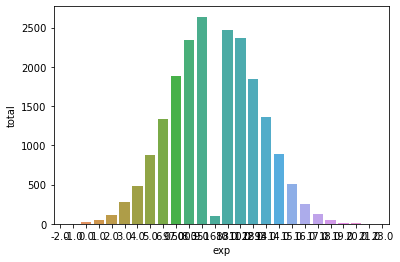

In [29]:
sns.barplot(x="exp",y = "total",data = cont_exp)

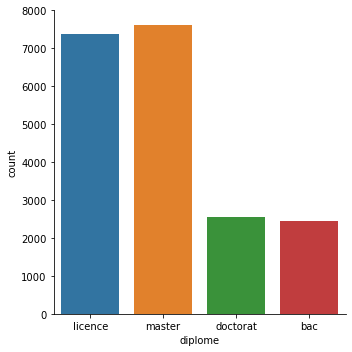

In [30]:
sns.catplot(x="diplome", kind = "count", data = file1)

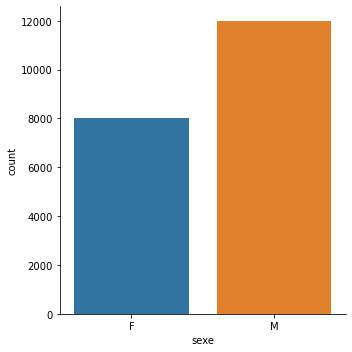

In [31]:
sns.catplot(x="sexe", kind = "count", data = file1)

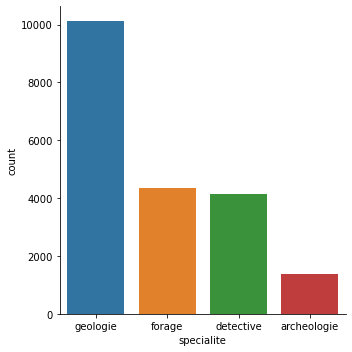

In [32]:
sns.catplot(x="specialite", kind = "count", data = file1)

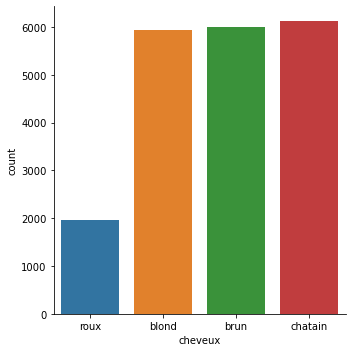

In [33]:
sns.catplot(x="cheveux", kind = "count", data = file1)

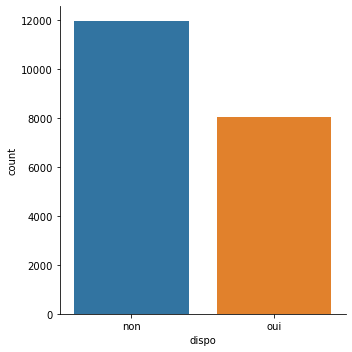

In [34]:
sns.catplot(x="dispo", kind = "count", data = file1)

In [35]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        20000 non-null  datetime64[ns]
 1   cheveux     20000 non-null  object        
 2   age         20000 non-null  float64       
 3   exp         20000 non-null  float64       
 4   salaire     20000 non-null  float64       
 5   sexe        20000 non-null  object        
 6   diplome     20000 non-null  object        
 7   specialite  20000 non-null  object        
 8   note        20000 non-null  float64       
 9   dispo       20000 non-null  object        
 10  embauche    20000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [36]:
cheveux = pd.get_dummies(file1["cheveux"], drop_first=True)
sexe = pd.get_dummies(file1["sexe"], drop_first=True)
diplome = pd.get_dummies(file1["diplome"], drop_first=True)
specialite = pd.get_dummies(file1["specialite"], drop_first=True)
dispo = pd.get_dummies(file1["dispo"], drop_first=True)

file1.drop(["cheveux", "sexe", "diplome", "specialite", "dispo"], axis = 1, inplace = True)

file1 = pd.concat([file1, cheveux, sexe, diplome, specialite, dispo], axis=1)

In [37]:
file1.info()
print(file1.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       20000 non-null  datetime64[ns]
 1   age        20000 non-null  float64       
 2   exp        20000 non-null  float64       
 3   salaire    20000 non-null  float64       
 4   note       20000 non-null  float64       
 5   embauche   20000 non-null  int64         
 6   brun       20000 non-null  uint8         
 7   chatain    20000 non-null  uint8         
 8   roux       20000 non-null  uint8         
 9   M          20000 non-null  uint8         
 10  doctorat   20000 non-null  uint8         
 11  licence    20000 non-null  uint8         
 12  master     20000 non-null  uint8         
 13  detective  20000 non-null  uint8         
 14  forage     20000 non-null  uint8         
 15  geologie   20000 non-null  uint8         
 16  oui        20000 non-null  uint8        

In [38]:
file1.head()

,date,age,exp,salaire,note,embauche,brun,chatain,roux,M,doctorat,licence,master,detective,forage,geologie,oui
0,2012-06-02,25.000000,9.0,26803.0,97.08,0,0,0,1,0,0,1,0,0,0,1,0
1,2011-04-21,35.000000,13.0,38166.0,63.86,0,0,0,0,1,0,1,0,0,1,0,0
2,2012-09-07,29.000000,13.0,35207.0,78.50,0,0,0,0,1,0,1,0,0,0,1,0
3,2011-07-01,35.004521,12.0,32442.0,45.09,0,1,0,0,1,0,1,0,0,0,1,0
4,2012-08-07,35.000000,6.0,28533.0,81.91,0,0,0,1,0,0,1,0,1,0,0,0


# Vamos criar o modelo

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [40]:
# Splitting dataset to x and y


y= file1.embauche
x= file1.drop(['embauche', "date"],axis=1)



In [41]:
# Let's use Logistic Regression in this case
# Defining my model
model = LogisticRegression(C = 0.000001) #default C number

# Divide the data into the training and testing set and train the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fitting the model
model.fit(x_train, y_train)

# Generate predictions on the test set
predictions_test = model.predict(x_test)



In [53]:
cm1 = confusion_matrix(y_test, predictions_test)
print(cm1)

[[3556    0]
 [ 444    0]]


In [54]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3556
           1       0.00      0.00      0.00       444

    accuracy                           0.89      4000
   macro avg       0.44      0.50      0.47      4000
weighted avg       0.79      0.89      0.84      4000



/Users/mariotsato/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariotsato/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariotsato/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
accuracy1 = accuracy_score(y_test, predictions_test)
print(accuracy1)

0.889
